## MELD Dataset exploration

In [1]:
import IPython.display as ipd
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd

In [2]:
hop_length = 512

### Inspect one example - comparison of MP3 and MP4 format

In [16]:
path = "/Users/agnieszkalenart/Documents/mannheim/master_thesis/thesis_erc/MELD.Raw/train/"
#file_0_v =path+"dia0_utt0.wav"
file_0_a =path+"dia0_utt0.wav"

In [17]:
x_a, sr_a = librosa.load(file_0_a)
#x_v, sr_v = librosa.load(file_0_v)


In [18]:
print(x_a.shape)
#print(x_v.shape)
print(sr_a)
#print(sr_v)

(125127,)
22050


Amplitude envelope  

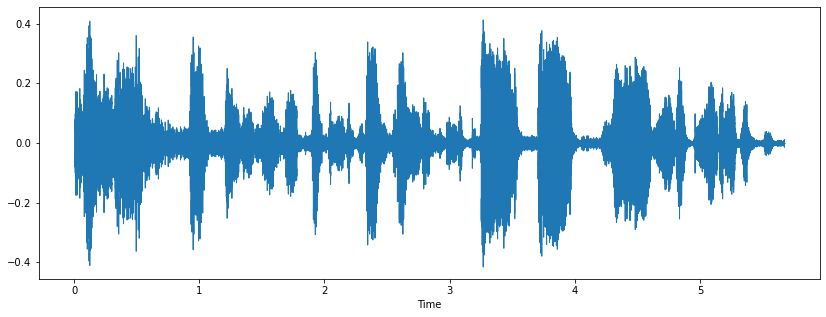

In [19]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_a, sr=sr_a)


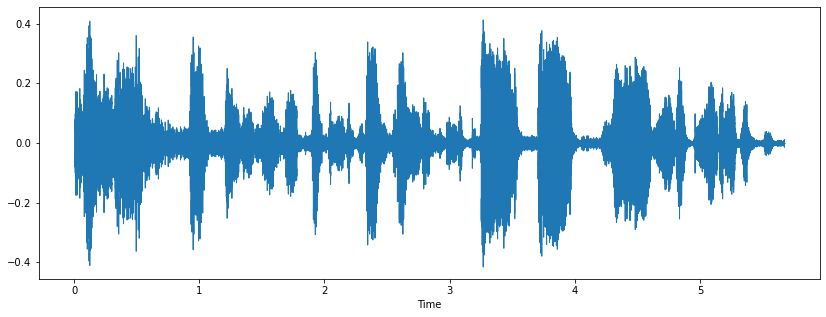

In [20]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_a, sr=sr_a)

Spectogram

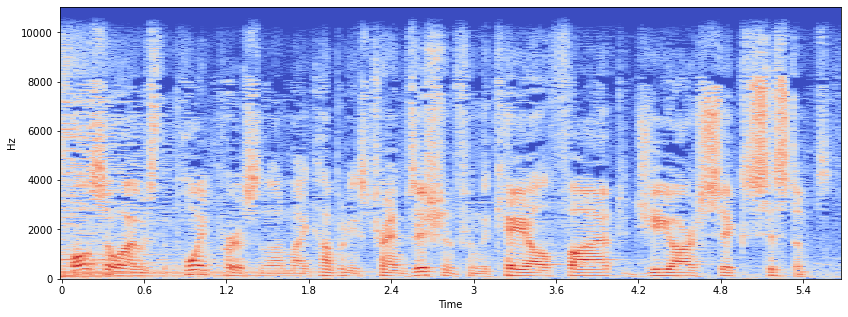

In [21]:
X = librosa.stft(x_a)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_a, x_axis='time', y_axis='hz')

In [22]:
#does not work in VS Code 

ipd.Audio(file_0_a,  autoplay=True) # load a local WAV file

Root-mean square (RMS)

RMS:  245


[Text(0.5, 1.0, 'log Power spectrogram')]

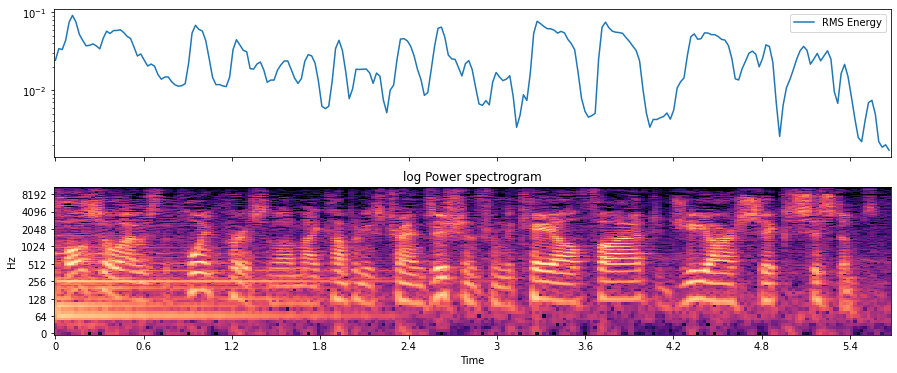

In [23]:
# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(X)
rms = librosa.feature.rms(S=S)
print("RMS: ",len(rms[0] ))
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

Zero crossing rate

Zero crossing rate: 20928


Text(0.5, 1.0, 'ZCR')

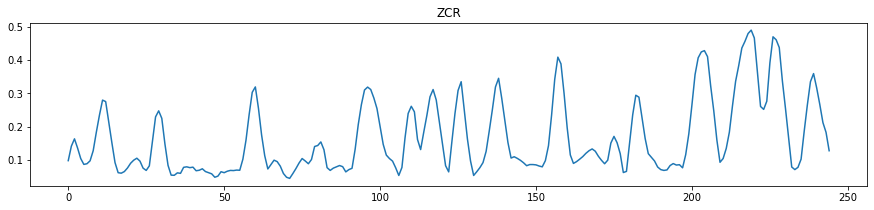

In [24]:
zcrs = librosa.feature.zero_crossing_rate(x_a)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(x_a))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('ZCR')

Mel-Frequency Cepstral Coefficients (MFCCs)

/var/folders/38/swct51zs3vv7zll5lr0r4lg40000gn/T/ipykernel_3440/2756569553.py:1: FutureWarning: Pass y=[-1.3453303e-03 -2.2066267e-02 -2.5286788e-02 ... -2.5343510e-05
 -2.8578509e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x_a, sr=sr_a)


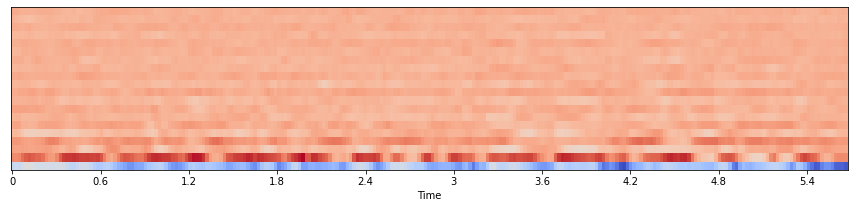

In [25]:
mfccs = librosa.feature.mfcc(x_a, sr=sr_a)
# Displaying  the MFCCs:
plt.figure(figsize=(15, 3))
librosa.display.specshow(mfccs, sr=sr_a, x_axis='time')


Chroma features

/var/folders/38/swct51zs3vv7zll5lr0r4lg40000gn/T/ipykernel_3440/2441524124.py:1: FutureWarning: Pass y=[-1.3453303e-03 -2.2066267e-02 -2.5286788e-02 ... -2.5343510e-05
 -2.8578509e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x_a, sr=sr_a, hop_length=hop_length)


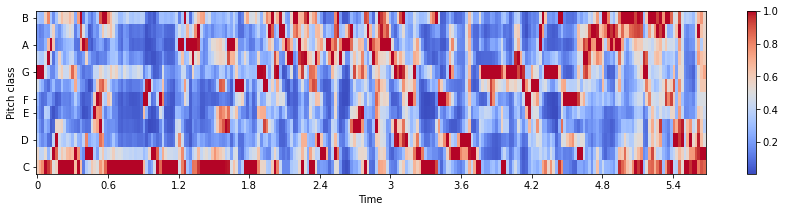

In [26]:
chromagram = librosa.feature.chroma_stft(x_a, sr=sr_a, hop_length=hop_length)
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fig.colorbar(img, ax=ax)

Tempogram

In [15]:
# Compute local onset autocorrelation
oenv = librosa.onset.onset_strength(y=x_a, sr=sr_a, hop_length=hop_length)
times = librosa.times_like(oenv, sr=sr_a, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr_a,
                                      hop_length=hop_length)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr_a,
                           hop_length=hop_length)[0]

[Text(0.5, 1.0, 'Tempogram')]

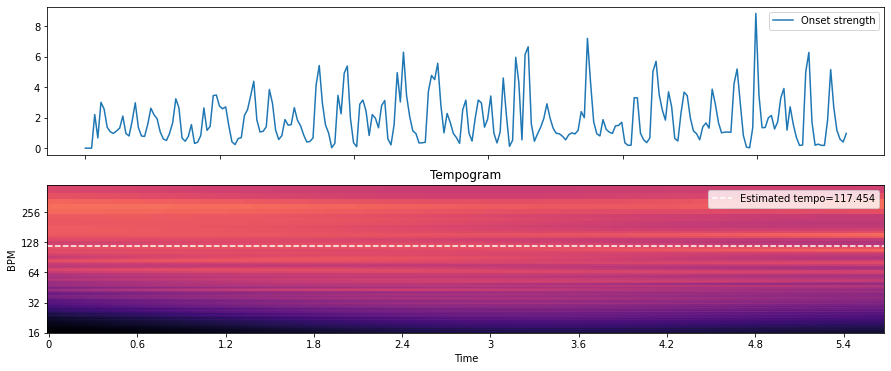

In [16]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 6))

ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr_a, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')

In [17]:
def extract_audio_features(file_path):
    # Load audio file
    audio_data, sample_rate = librosa.load(file_path)

    # Extract audio features
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    chroma_stft = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_data)

    # Concatenate all features into a single array
    features = np.concatenate([mfccs.mean(axis=1), chroma_stft.mean(axis=1), 
                               spectral_centroid.mean(axis=1), spectral_bandwidth.mean(axis=1), 
                               spectral_contrast.mean(axis=1), spectral_rolloff.mean(axis=1), 
                               zero_crossing_rate.mean(axis=1)])

    return features

In [38]:
audio_data, sample_rate = librosa.load("/Users/agnieszkalenart/Documents/mannheim/master_thesis/thesis_erc/MELD.Raw/train/dia47_utt11.mp4")
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
chroma_stft = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate)
spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_data)
print([mfccs.mean(axis=1), chroma_stft.mean(axis=1), 
                               spectral_centroid.mean(), spectral_bandwidth.mean(), 
                               spectral_contrast.mean(axis=1), spectral_rolloff.mean(), 
                               zero_crossing_rate.mean()])
features = np.concatenate([mfccs.mean(axis=1), chroma_stft.mean(axis=1), 
                               spectral_centroid.mean(axis=1), spectral_bandwidth.mean(axis=1), 
                               spectral_contrast.mean(axis=1), spectral_rolloff.mean(axis=1), 
                               zero_crossing_rate.mean(axis=1)])

    # Reshape the feature array to have a single row
features = features.reshape(1, -1)

/Users/agnieszkalenart/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


[array([-2.6505432e+02,  1.1753773e+02, -2.4570660e+01,  2.6948450e+01,
       -1.4798779e+01,  4.4443056e-01, -1.2212765e+01, -5.9245181e+00,
       -1.7035339e+01,  6.3419294e+00, -1.0446096e+01,  6.5721331e+00,
       -8.2628736e+00,  1.5658840e+00, -1.4418666e+00,  2.4134266e+00,
       -8.7965498e+00,  4.7559733e+00, -5.2450352e+00, -1.1920402e+00,
       -8.1658726e+00,  5.1715469e-01, -6.0900240e+00,  1.1157961e-01,
       -4.1245694e+00,  1.2680097e+00, -6.9272499e+00,  2.5120788e+00,
       -4.6924176e+00, -2.8914082e+00, -3.4125743e+00, -4.7562766e-01,
       -5.2208586e+00,  1.8351204e+00,  3.1061739e-01,  5.7580414e+00,
        1.8657714e+00,  3.2370646e+00, -3.8126657e+00, -2.1389308e+00],
      dtype=float32), array([0.3646525 , 0.431629  , 0.34398517, 0.31039873, 0.294211  ,
       0.3195158 , 0.52115864, 0.41129196, 0.40940922, 0.45198178,
       0.44239926, 0.37844625], dtype=float32), 1944.9639635170727, 1910.66474239681, array([15.85250084, 15.51274154, 17.46362693, 

In [19]:
#np.shape(mfccs.mean(axis=1))
#np.shape(spectral_centroid.mean(axis=1))
#print(spectral_contrast.mean(axis=1).mean())
spectral_bandwidth.mean(axis=1)

array([1910.6647424])

In [31]:
#load the data
import os
import glob
import numpy as np
import librosa

folder_path = "/Users/agnieszkalenart/Documents/mannheim/master_thesis/thesis_erc/MELD.Raw/train"
audio_files = glob.glob(os.path.join(folder_path, '*.mp4'))

train_features = []
dialogue_ids = []
utterance_ids = []

for file_path in audio_files:
    features = extract_audio_features(file_path)
    train_features.append(features)
    dialogue_ids.append(file_path.split('/')[-1].split('_')[0])
    utterance_ids.append(file_path.split('/')[-1].split('_')[1].split('.')[0])

# Convert list of features to a 2D numpy array
#train_features = np.vstack(train_features)


/Users/agnieszkalenart/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/agnieszkalenart/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/agnieszkalenart/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/agnieszkalenart/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/agnieszkalenart/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/agnieszkalenart/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWar

In [41]:
train_features_withids = np.hstack((np.array(dialogue_ids).reshape(-1,1), np.array(utterance_ids).reshape(-1,1), train_features))
train_features_withids_df = pd.DataFrame(train_features_withids)
train_features_withids_df
train_features_withids_df.to_csv("/Users/agnieszkalenart/Documents/mannheim/master_thesis/thesis_erc/MELD.Raw/train_features_withids.csv", index=False)

In [43]:
train_features_withids_df.rename(columns={0: "Dialogue_ID", 1: "Utterance_ID"}, inplace=True)

In [46]:
train_features_withids_df['Dialogue_ID'] = train_features_withids_df['Dialogue_ID'].str.replace('dia', '')
train_features_withids_df['Utterance_ID'] = train_features_withids_df['Utterance_ID'].str.replace('utt', '')

In [49]:
train_features_withids_df = train_features_withids_df.astype({"Dialogue_ID": int, "Utterance_ID": int})

In [52]:
train_features_withids_df

,Dialogue_ID,Utterance_ID,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,47,11,-265.0543212890625,117.53772735595703,-24.570659637451172,26.948450088500977,-14.798778533935547,0.44443055987358093,-12.212764739990234,-5.92451810836792,...,1910.66474239681,15.852500837748705,15.512741541504337,17.463626925389697,15.588596167231712,17.17957117164516,19.746463303153647,48.75095118555933,3654.5301649305557,0.10718677662037036
1,35,2,-428.9296875,138.53143310546875,-9.848904609680176,18.4149227142334,-4.057723045349121,8.691094398498535,-3.8019936084747314,6.349808216094971,...,2044.7932905762134,12.685567878864811,9.773575457074477,14.620163354523871,14.252895463854061,16.105928044966653,16.592436817519474,41.783688515683856,3225.3662109375,0.060581752232142856
2,956,14,-375.8118896484375,113.05878448486328,-20.427959442138672,31.27173614501953,-23.332351684570312,-4.311886310577393,-5.3007073402404785,-3.273951292037964,...,1804.2156586234714,15.864176902415377,20.362134138644556,23.17977637263556,23.33982435976862,25.193145906650074,21.99140536804307,49.864276908136546,3370.302799048013,0.09193592197847682
3,1032,1,-359.9605407714844,96.9181900024414,-13.71373462677002,18.85255241394043,-1.1350009441375732,6.518782615661621,-8.918047904968262,7.503124713897705,...,2434.8739708521703,18.19829546784962,12.940571939320392,15.304175952790649,14.888415383213545,16.118312876263104,16.780404586183014,51.09502296708092,5169.426237547762,0.12857575395742357
4,47,9,-326.5227966308594,138.8068084716797,-12.754868507385254,16.334436416625977,-6.406932353973389,6.013060569763184,-7.495267391204834,1.6850707530975342,...,1982.8758318236087,16.10167803091911,13.272134809129765,14.850121068315978,13.931947637836949,15.930926133732163,16.384326891841635,47.78289931723993,3285.60791015625,0.0674409412202381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,424,4,-323.5183410644531,79.6320571899414,-9.798957824707031,39.498451232910156,-15.810783386230469,11.289128303527832,-18.394662857055664,3.8785808086395264,...,2189.466322439645,20.42729132267697,15.974330459373581,16.797194690098063,17.086831079645346,17.204095828723442,17.515931601735186,50.53962343618613,4927.840909090909,0.14204792061237373
9538,189,0,-327.918212890625,110.6866683959961,-12.45229434967041,31.58822250366211,-26.482942581176758,18.1427001953125,0.44116199016571045,6.779226779937744,...,1912.6690179224927,16.895273968757984,18.4617369104752,20.460274388449143,20.077655373317228,23.8790582430398,21.390184721510344,49.164479629445786,4023.1998697916665,0.11124855324074075
9539,120,14,-302.99456787109375,106.14524841308594,-42.3266716003418,23.394378662109375,-5.205656051635742,5.7602338790893555,-24.499284744262695,-6.672614097595215,...,1727.2808666392134,17.505561222181818,20.537156010823665,21.3368715281289,20.406123167415114,20.94847637889744,20.671597879280718,48.487655402870736,3331.1865234375,0.09885817307692307
9540,241,2,-194.3605499267578,95.51726531982422,-55.13710403442383,22.178956985473633,-4.370237350463867,-10.792500495910645,-13.860817909240723,0.8821408152580261,...,1796.0249327645633,11.235968908744217,13.421907773875892,19.54363256019208,20.859142198652794,21.955693961324826,22.27115721243977,41.41681966649519,3363.665771484375,0.1085205078125


In [22]:
print(len(train_features))
print(len(audio_files))
print(audio_files[8562])

8562
9543
/Users/agnieszkalenart/Documents/mannheim/master_thesis/thesis_erc/MELD.Raw/train/dia125_utt3.mp4


In [29]:
#load labels
labels = pd.read_csv("/Users/agnieszkalenart/Documents/mannheim/master_thesis/thesis_erc/MELD.Raw/train_sent_emo.csv")
labels.head()

# emotion_labels = labels['Emotion'].values
# print(emotion_labels)

labels.drop(['Utterance','Sr No.','Utterance','Speaker','Sentiment','Season','Episode','StartTime','EndTime'], axis=1, inplace=True)

In [30]:
labels

,Emotion,Dialogue_ID,Utterance_ID
0,neutral,0,0
1,neutral,0,1
2,neutral,0,2
3,neutral,0,3
4,surprise,0,4
...,...,...,...
9984,neutral,1038,13
9985,neutral,1038,14
9986,surprise,1038,15
9987,neutral,1038,16


In [53]:
train_dataset = pd.merge(labels, train_features_withids_df,  how='right', left_on=['Dialogue_ID','Utterance_ID'], right_on = ['Dialogue_ID','Utterance_ID'])

In [61]:
train_dataset

,Emotion,Dialogue_ID,Utterance_ID,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
0,surprise,47,11,-265.0543212890625,117.53772735595703,-24.570659637451172,26.948450088500977,-14.798778533935547,0.44443055987358093,-12.212764739990234,...,1910.66474239681,15.852500837748705,15.512741541504337,17.463626925389697,15.588596167231712,17.17957117164516,19.746463303153647,48.75095118555933,3654.5301649305557,0.10718677662037036
1,joy,35,2,-428.9296875,138.53143310546875,-9.848904609680176,18.4149227142334,-4.057723045349121,8.691094398498535,-3.8019936084747314,...,2044.7932905762134,12.685567878864811,9.773575457074477,14.620163354523871,14.252895463854061,16.105928044966653,16.592436817519474,41.783688515683856,3225.3662109375,0.060581752232142856
2,neutral,956,14,-375.8118896484375,113.05878448486328,-20.427959442138672,31.27173614501953,-23.332351684570312,-4.311886310577393,-5.3007073402404785,...,1804.2156586234714,15.864176902415377,20.362134138644556,23.17977637263556,23.33982435976862,25.193145906650074,21.99140536804307,49.864276908136546,3370.302799048013,0.09193592197847682
3,neutral,1032,1,-359.9605407714844,96.9181900024414,-13.71373462677002,18.85255241394043,-1.1350009441375732,6.518782615661621,-8.918047904968262,...,2434.8739708521703,18.19829546784962,12.940571939320392,15.304175952790649,14.888415383213545,16.118312876263104,16.780404586183014,51.09502296708092,5169.426237547762,0.12857575395742357
4,neutral,47,9,-326.5227966308594,138.8068084716797,-12.754868507385254,16.334436416625977,-6.406932353973389,6.013060569763184,-7.495267391204834,...,1982.8758318236087,16.10167803091911,13.272134809129765,14.850121068315978,13.931947637836949,15.930926133732163,16.384326891841635,47.78289931723993,3285.60791015625,0.0674409412202381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,neutral,424,4,-323.5183410644531,79.6320571899414,-9.798957824707031,39.498451232910156,-15.810783386230469,11.289128303527832,-18.394662857055664,...,2189.466322439645,20.42729132267697,15.974330459373581,16.797194690098063,17.086831079645346,17.204095828723442,17.515931601735186,50.53962343618613,4927.840909090909,0.14204792061237373
9538,fear,189,0,-327.918212890625,110.6866683959961,-12.45229434967041,31.58822250366211,-26.482942581176758,18.1427001953125,0.44116199016571045,...,1912.6690179224927,16.895273968757984,18.4617369104752,20.460274388449143,20.077655373317228,23.8790582430398,21.390184721510344,49.164479629445786,4023.1998697916665,0.11124855324074075
9539,neutral,120,14,-302.99456787109375,106.14524841308594,-42.3266716003418,23.394378662109375,-5.205656051635742,5.7602338790893555,-24.499284744262695,...,1727.2808666392134,17.505561222181818,20.537156010823665,21.3368715281289,20.406123167415114,20.94847637889744,20.671597879280718,48.487655402870736,3331.1865234375,0.09885817307692307
9540,neutral,241,2,-194.3605499267578,95.51726531982422,-55.13710403442383,22.178956985473633,-4.370237350463867,-10.792500495910645,-13.860817909240723,...,1796.0249327645633,11.235968908744217,13.421907773875892,19.54363256019208,20.859142198652794,21.955693961324826,22.27115721243977,41.41681966649519,3363.665771484375,0.1085205078125


In [68]:
data = train_dataset.drop(['Dialogue_ID','Utterance_ID','Emotion'], axis=1)
target = train_dataset['Emotion']

In [55]:
train_dataset.to_csv("/Users/agnieszkalenart/Documents/mannheim/master_thesis/thesis_erc/MELD.Raw/train_dataset.csv", index=False)

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Create an instance of the label encoder and fit it to the target data
le = LabelEncoder()
le.fit(y_train)

# Transform the target data using the label encoder
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Create an instance of the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train_enc)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Calculate the F1-score of the model
f1score = f1_score(y_test_enc, y_pred, average='weighted')

# Print the F1-score
print("F1-score:", f1score)


F1-score: 0.3157192647756487


/Users/agnieszkalenart/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


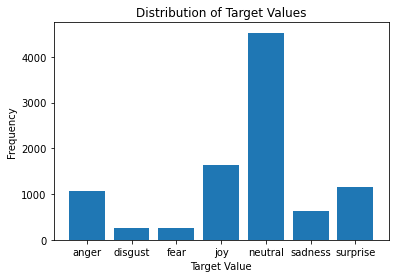

In [74]:
# Count the frequency of each target value
values, counts = np.unique(target, return_counts=True)

# Create a bar chart of the target value distribution
plt.bar(values, counts)

# Add x-axis and y-axis labels and a title
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Values')

# Show the plot
plt.show()
